In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
x=dataset.iloc[:,[2,3]]
y=dataset.iloc[:,4]

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)
     

In [9]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [10]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[62,  6],
       [ 3, 29]], dtype=int64)

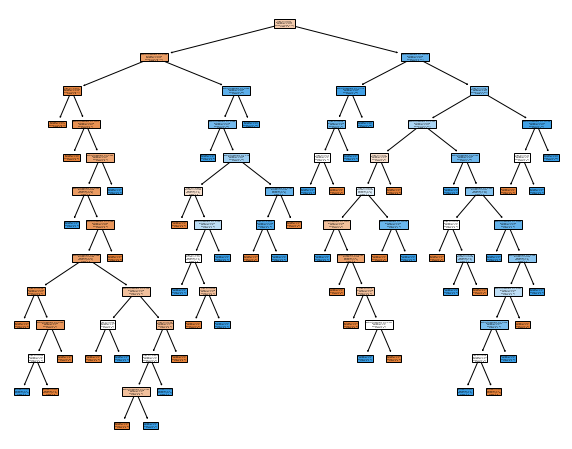

In [8]:
plt.figure(figsize=(10, 8))
plot_tree(classifier, feature_names=['Age', 'EstimatedSalary'], class_names=['0', '1'], filled=True)
plt.show()
     

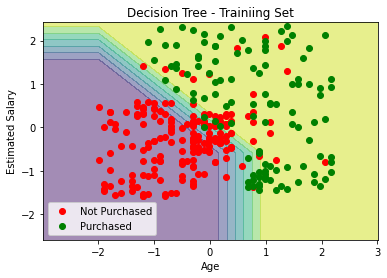

In [38]:
# from matplotlib.colors import ListedColormap
X1, X2 = np.meshgrid(np.arange(start = x_train[:, 0].min() - 1, stop = x_train[:, 0].max() + 1),
                     np.arange(start = x_train[:, 1].min() - 1, stop = x_train[:, 1].max() + 1))
# Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
# Z = Z.reshape(X1.shape)
plt.contourf(X1, X2, Z, alpha = 0.5)
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], color = 'red', label = 'Not Purchased')
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], color = 'green', label = 'Purchased')
plt.title('Decision Tree - Trainiing Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
# plt.show()

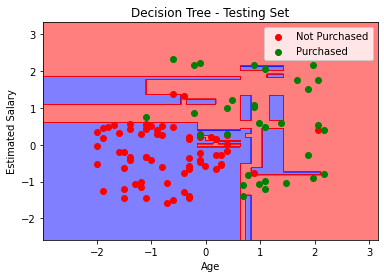

In [15]:
from matplotlib.colors import ListedColormap
X1, X2 = np.meshgrid(np.arange(start = x_test[:, 0].min() - 1, stop = x_test[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_test[:, 1].min() - 1, stop = x_test[:, 1].max() + 1, step = 0.01))
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)
cmap = ListedColormap(('blue',"red"))
plt.contourf(X1, X2, Z, alpha = 0.5, cmap = cmap)
plt.scatter(x_test[y_test == 0, 0], x_test[y_test == 0, 1], color = 'red', label = 'Not Purchased')
plt.scatter(x_test[y_test == 1, 0], x_test[y_test == 1, 1], color = 'green', label = 'Purchased')
plt.title('Decision Tree - Testing Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import accuracy_score
print("the accuracy score is :",accuracy_score(y_pred,y_test))

the accuracy score is : 0.91
